## Исследование надёжности заёмщиков

Заказчик — кредитный отдел банка. Нужно разобраться, влияет ли семейное положение и количество детей клиента на факт погашения кредита в срок. Входные данные от банка — статистика о платёжеспособности клиентов.

Результаты исследования будут учтены при построении модели **кредитного скоринга** — специальной системы, которая оценивает способность потенциального заёмщика вернуть кредит банку.

### Шаг 1. Откройте файл с данными и изучите общую информацию. 

In [1]:

import pandas as pd
df = pd.read_csv('/datasets/data.csv')

In [2]:
df.head(20)

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose
0,1,-8437.673028,42,высшее,0,женат / замужем,0,F,сотрудник,0,253875.639453,покупка жилья
1,1,-4024.803754,36,среднее,1,женат / замужем,0,F,сотрудник,0,112080.014102,приобретение автомобиля
2,0,-5623.422610,33,Среднее,1,женат / замужем,0,M,сотрудник,0,145885.952297,покупка жилья
3,3,-4124.747207,32,среднее,1,женат / замужем,0,M,сотрудник,0,267628.550329,дополнительное образование
4,0,340266.072047,53,среднее,1,гражданский брак,1,F,пенсионер,0,158616.077870,сыграть свадьбу
5,0,-926.185831,27,высшее,0,гражданский брак,1,M,компаньон,0,255763.565419,покупка жилья
6,0,-2879.202052,43,высшее,0,женат / замужем,0,F,компаньон,0,240525.971920,операции с жильем
7,0,-152.779569,50,СРЕДНЕЕ,1,женат / замужем,0,M,сотрудник,0,135823.934197,образование
8,2,-6929.865299,35,ВЫСШЕЕ,0,гражданский брак,1,F,сотрудник,0,95856.832424,на проведение свадьбы
9,0,-2188.756445,41,среднее,1,женат / замужем,0,M,сотрудник,0,144425.938277,покупка жилья для семьи


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21525 entries, 0 to 21524
Data columns (total 12 columns):
children            21525 non-null int64
days_employed       19351 non-null float64
dob_years           21525 non-null int64
education           21525 non-null object
education_id        21525 non-null int64
family_status       21525 non-null object
family_status_id    21525 non-null int64
gender              21525 non-null object
income_type         21525 non-null object
debt                21525 non-null int64
total_income        19351 non-null float64
purpose             21525 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 2.0+ MB


### Вывод



Рассмотрим полученную информацию.

Всего в таблице 12 столбцов, тип данных у столбцов отличается, а именно 2 столбца имеют тип данных - float64, 5 столбцов - int64 и 5 столбцов - object.

Рассмотрим подробно, какие в df столбцы и какую информацию они содержат:

children — количество детей;
days_employed — сведения о трудовом стаже, представленные в виде количества трудовых дней;
dob_years — возраст;
education — образование;
education_id — идентификатор сведений об образовании;
family_status — семейное положение;
family_status_id — идентификатор информации о семейном положении;
gender - пол;
income_type - вид дохода;
debt - сведения о наличии просроченной задолженности по кредиту; 
total_income - суммарный доход;
purpose - цуль получения кредита.
Количество значений в столбцах различается. Это говорит о том, что в данных есть пропущенные значения.

Каждая строка таблицы содержит информацию о личных данных клиента, его платежеспособности и цели получения кредитных ресурсов. На данном этапе мы видим 4 проблемы, которые небходимо решать: пропуски, наличие отрицательных значений в столбце days_emloyed с информацией о трудовом стаже и тип данных у данного столбца, а именно вещественный тип данных, а также разный регистр у значений по стобцу education. Для проверки рабочих гипотез особенно ценны столбцы children, family_status, total_income и purpose. 

### Шаг 2. Предобработка данных

### Обработка пропусков

методом isnull() найдем все пропуски в таблице df

In [4]:
df.isnull().sum()


children               0
days_employed       2174
dob_years              0
education              0
education_id           0
family_status          0
family_status_id       0
gender                 0
income_type            0
debt                   0
total_income        2174
purpose                0
dtype: int64

Мы наблюдаем наличие пропусков в 2174 строках по столбцам days_employed и total_income, причина появления которых может быть различной, например техническая ошибка специалиста банка при сборе информации о клиенте либо нежелание клиента предоставлять информацию о своем трудовом стаже и суммарном доходе.

для примера методом isnull() найдем все пропуски в столбце 'total_income' и просмотрим первые 30


In [5]:
df['total_income'].isnull()
df.head(30)


,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose
0,1,-8437.673028,42,высшее,0,женат / замужем,0,F,сотрудник,0,253875.639453,покупка жилья
1,1,-4024.803754,36,среднее,1,женат / замужем,0,F,сотрудник,0,112080.014102,приобретение автомобиля
2,0,-5623.422610,33,Среднее,1,женат / замужем,0,M,сотрудник,0,145885.952297,покупка жилья
3,3,-4124.747207,32,среднее,1,женат / замужем,0,M,сотрудник,0,267628.550329,дополнительное образование
4,0,340266.072047,53,среднее,1,гражданский брак,1,F,пенсионер,0,158616.077870,сыграть свадьбу
5,0,-926.185831,27,высшее,0,гражданский брак,1,M,компаньон,0,255763.565419,покупка жилья
6,0,-2879.202052,43,высшее,0,женат / замужем,0,F,компаньон,0,240525.971920,операции с жильем
7,0,-152.779569,50,СРЕДНЕЕ,1,женат / замужем,0,M,сотрудник,0,135823.934197,образование
8,2,-6929.865299,35,ВЫСШЕЕ,0,гражданский брак,1,F,сотрудник,0,95856.832424,на проведение свадьбы
9,0,-2188.756445,41,среднее,1,женат / замужем,0,M,сотрудник,0,144425.938277,покупка жилья для семьи


   Мы наблюдаем наличие пропусков в обоих указанных столбцах по одной отдельно взятой строке, то есть неполнота вышеназванных данных отображается по одному конкретному клиенту, что косвенно может подтверждать вышеуказанное предположение о возможном наличии ошибки со стороны специалиста банка либо нежелании данного конкретного клиента предоставлять указанную информацию.
   Так как мы наблюдаем пропущенные значения в столбцах, содержащих информацию о сумме рабочих дней и сумме общего дохода, в связи с этим необходимо заменить пропущенные значения в данных столбцах на значение медианы по каждому из указанных столбцов с учетом информации о виде дохода, отображенной в столбце  income_type. Вместе с тем, в столбце 'days_employed' мы наблюдаем наличие отрицательных значений, в связи с этим для корректного определения медианы по данному столбцу необходимо осуществить перевод отрицательных чисел в положительные.

для перевода значений столбца 'days_employed'из отрицательных в положительные 
применим к данному столбцу функцию abs(), которая возвращает абсолютное значение числа,
переднного ей в качестве аргумента

In [6]:
df['days_employed'] = df['days_employed'].abs()

Проверим результат действия функции путем примнения функции count() к столбцу 'days_employed' с применением логического условия,а именно значение строки в указанном столбце должно быть меньше 0, тем самым подсчитаем количество строк в указанном столбце со сзначениями меньше 0

In [7]:
df[df['days_employed'] < 0]['days_employed'].count()

0

Мы видим, что теперь в столбце 'days_employed' отсутствуют отрицательные значения. Ниже проведем аналогичные вычисления для столбцов 'children', 'total_income', 'dob_years', наличие отрицательных значений в которых также может некорректно отразиться на результатах проверки рабочих гипотез в ходе анализа рассматриваемой таблицы, то есть определим наличие в укаказанных столбцах отрицательных знаений и в случае их наличия осуществим их перевод в положительные числа путем использования функции abs(), после чего проверим результат действия функции.

In [8]:
df[df['children'] < 0]['children'].count()

47

In [9]:
df['children'] = df['children'].abs()
df[df['children'] < 0]['children'].count()

0

In [10]:
df[df['total_income'] < 0]['total_income'].count()

0

In [11]:
df[df['dob_years'] < 0]['dob_years'].count()

0

После перевода отрицательных значений в положительные в необходимых столбцах можно приступать к замене пропущенных значений в столбцах days_employed и total_income, так как удаление указанных пропусков может привести к уменьшению точности выводов после проврки приведенных гипотез. Для замены используем значение медианы по каждому из указанных столбцов в разрезе каждой уникальной категории столбца income_type, то есть в разрезе видов дохода.Выбрано именно значение медианы по столбцу, так как преимущество медианы заключается в устойчивости к выбросам, то есть аномально большим или малым значениям. Для замены значений в столбцах используем нижеотображенную функцию.

Используем функцию result_to_median, которая принимает в виде аргументов income_type_list - список значений по столбцу income_type и column - наименование столбца, в котором происходит замена NaN. Функция будет перебирать значения в столбце income_type, а также в интересующих столбцах, требующих замены NaN, и при соблюдении нижеотображенного логического условия. NaN в выбранном столбце будут заменены на медиану значений этого столбца в разрезе видов дохода. В результате работы функция будет возвращать таблицу df.

In [12]:
def result_to_median(income_type_list, column):
    for i in income_type_list:
        median_column = df[df.income_type == i][column].median()        
        df.loc[((df.income_type == i) & (df[column].isna())), column] = median_column
    return df

Вызовем функцию и проверим результат ее действия, получив информацию о таблице после вызова функции
и получив первые 30 строк таблицы df для наглядности

In [13]:
df = result_to_median(df.income_type.unique(), 'total_income')
df = result_to_median(df.income_type.unique(), 'days_employed')
df.info()
df.head(30)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21525 entries, 0 to 21524
Data columns (total 12 columns):
children            21525 non-null int64
days_employed       21525 non-null float64
dob_years           21525 non-null int64
education           21525 non-null object
education_id        21525 non-null int64
family_status       21525 non-null object
family_status_id    21525 non-null int64
gender              21525 non-null object
income_type         21525 non-null object
debt                21525 non-null int64
total_income        21525 non-null float64
purpose             21525 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 2.0+ MB


,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose
0,1,8437.673028,42,высшее,0,женат / замужем,0,F,сотрудник,0,253875.639453,покупка жилья
1,1,4024.803754,36,среднее,1,женат / замужем,0,F,сотрудник,0,112080.014102,приобретение автомобиля
2,0,5623.422610,33,Среднее,1,женат / замужем,0,M,сотрудник,0,145885.952297,покупка жилья
3,3,4124.747207,32,среднее,1,женат / замужем,0,M,сотрудник,0,267628.550329,дополнительное образование
4,0,340266.072047,53,среднее,1,гражданский брак,1,F,пенсионер,0,158616.077870,сыграть свадьбу
5,0,926.185831,27,высшее,0,гражданский брак,1,M,компаньон,0,255763.565419,покупка жилья
6,0,2879.202052,43,высшее,0,женат / замужем,0,F,компаньон,0,240525.971920,операции с жильем
7,0,152.779569,50,СРЕДНЕЕ,1,женат / замужем,0,M,сотрудник,0,135823.934197,образование
8,2,6929.865299,35,ВЫСШЕЕ,0,гражданский брак,1,F,сотрудник,0,95856.832424,на проведение свадьбы
9,0,2188.756445,41,среднее,1,женат / замужем,0,M,сотрудник,0,144425.938277,покупка жилья для семьи


### Вывод

В результате обработки пропусков мы получили таблицу с отсутствующими пропущенными значениями, которые заменены на значения медиан по каждому из указанных столбцов в разрезе каждого уникального вида дохода.

### Замена типа данных

Для корректного отображения информации необходимо изменить тип данных столбца 'days-employed' с вещественного на целочисленный.

Мы наблюдаем в столбце 'days_employed' наличие значений с типом данных float, что не совсем корректно при оценке количества отработанных дней, поэтому изменим тип данных указанного столбца на int, использем для этого метод astype(), который позволяет изменить тип данных конкретного столбца на необходимый тип данных, в данном случае с float на int.

In [14]:
df['days_employed'] = df['days_employed'].astype('int')

Для проверки получим информацию по таблице df  и выведем для наглядности первые 10 строк таблицы df

In [15]:
df.info()
df.head(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21525 entries, 0 to 21524
Data columns (total 12 columns):
children            21525 non-null int64
days_employed       21525 non-null int64
dob_years           21525 non-null int64
education           21525 non-null object
education_id        21525 non-null int64
family_status       21525 non-null object
family_status_id    21525 non-null int64
gender              21525 non-null object
income_type         21525 non-null object
debt                21525 non-null int64
total_income        21525 non-null float64
purpose             21525 non-null object
dtypes: float64(1), int64(6), object(5)
memory usage: 2.0+ MB


,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose
0,1,8437,42,высшее,0,женат / замужем,0,F,сотрудник,0,253875.639453,покупка жилья
1,1,4024,36,среднее,1,женат / замужем,0,F,сотрудник,0,112080.014102,приобретение автомобиля
2,0,5623,33,Среднее,1,женат / замужем,0,M,сотрудник,0,145885.952297,покупка жилья
3,3,4124,32,среднее,1,женат / замужем,0,M,сотрудник,0,267628.550329,дополнительное образование
4,0,340266,53,среднее,1,гражданский брак,1,F,пенсионер,0,158616.077870,сыграть свадьбу
5,0,926,27,высшее,0,гражданский брак,1,M,компаньон,0,255763.565419,покупка жилья
6,0,2879,43,высшее,0,женат / замужем,0,F,компаньон,0,240525.971920,операции с жильем
7,0,152,50,СРЕДНЕЕ,1,женат / замужем,0,M,сотрудник,0,135823.934197,образование
8,2,6929,35,ВЫСШЕЕ,0,гражданский брак,1,F,сотрудник,0,95856.832424,на проведение свадьбы
9,0,2188,41,среднее,1,женат / замужем,0,M,сотрудник,0,144425.938277,покупка жилья для семьи


### Вывод

Мы видим, что после применения метода astype() к столбцу 'days_employed' тип данных указанного столбца стал int, то есть в строках указанного столбца получили целые числа.

### Обработка дубликатов

Далее необходимо установить наличие дубликатов в таблице df.  Если таковые найдутся, то удаляем и проверяем, все дубликаты ли удалились.

Прежде, чем начать поиск и удаление дубликатов,все символы строк столбца 'education' приведем к нижнему регистру,
чтобы учесть такие дубликаты, а также выведем первые 20 строк полученной таблицы df для просмотра результата.


In [16]:
df['education'] = df['education'].str.lower()
df.head(20)

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose
0,1,8437,42,высшее,0,женат / замужем,0,F,сотрудник,0,253875.639453,покупка жилья
1,1,4024,36,среднее,1,женат / замужем,0,F,сотрудник,0,112080.014102,приобретение автомобиля
2,0,5623,33,среднее,1,женат / замужем,0,M,сотрудник,0,145885.952297,покупка жилья
3,3,4124,32,среднее,1,женат / замужем,0,M,сотрудник,0,267628.550329,дополнительное образование
4,0,340266,53,среднее,1,гражданский брак,1,F,пенсионер,0,158616.077870,сыграть свадьбу
5,0,926,27,высшее,0,гражданский брак,1,M,компаньон,0,255763.565419,покупка жилья
6,0,2879,43,высшее,0,женат / замужем,0,F,компаньон,0,240525.971920,операции с жильем
7,0,152,50,среднее,1,женат / замужем,0,M,сотрудник,0,135823.934197,образование
8,2,6929,35,высшее,0,гражданский брак,1,F,сотрудник,0,95856.832424,на проведение свадьбы
9,0,2188,41,среднее,1,женат / замужем,0,M,сотрудник,0,144425.938277,покупка жилья для семьи


Получаем суммарное количество дубликатов в таблице df  методом duplicated() в сочетании с методом sum()

In [17]:
df.duplicated().sum()

71

Удаляем все дубликаты из таблицы df методом drop_duplicates(), исользуем метод reset_index для сохранения порядка индексов, проверяем наличие дубликатов в таблице df после их удаления.

In [18]:
df = df.drop_duplicates().reset_index (drop = True)
df.duplicated().sum()

0

Чтобы убедиться в отсутствии дубликатов в ключевых столбцах, применим к данным столбцам метод value_counts()

In [19]:
df['education'].value_counts()

среднее                15172
высшее                  5250
неоконченное высшее      744
начальное                282
ученая степень             6
Name: education, dtype: int64

In [20]:
df['family_status'].value_counts()

женат / замужем          12339
гражданский брак          4151
Не женат / не замужем     2810
в разводе                 1195
вдовец / вдова             959
Name: family_status, dtype: int64

In [21]:
df['income_type'].value_counts()

сотрудник          11084
компаньон           5078
пенсионер           3829
госслужащий         1457
предприниматель        2
безработный            2
в декрете              1
студент                1
Name: income_type, dtype: int64

In [22]:
df['purpose'].value_counts()

свадьба                                   791
на проведение свадьбы                     768
сыграть свадьбу                           765
операции с недвижимостью                  675
покупка коммерческой недвижимости         661
операции с жильем                         652
покупка жилья для сдачи                   651
операции с коммерческой недвижимостью     650
покупка жилья                             646
жилье                                     646
покупка жилья для семьи                   638
строительство собственной недвижимости    635
недвижимость                              633
операции со своей недвижимостью           627
строительство жилой недвижимости          624
покупка недвижимости                      621
покупка своего жилья                      620
строительство недвижимости                619
ремонт жилью                              607
покупка жилой недвижимости                606
на покупку своего автомобиля              505
заняться высшим образованием      

### Вывод

Путем отработки дубликатов вышеуказанными методами мы убедились в их отсутствии, появление которых может быть связано с разными причинами, например с технической ошибкой специалиста, ответственного за ввод указанной информации в базу данных клиентов. 
Вместе с тем, информация о цели получения кредита, отображенная в столбце 'purpose', явлется довольно разрозненной, при этом некоторые цели кредита, написанные в виде различных словосочетаний, имеют идентичную или схожую смысловую нагрузку, в связи с чем, чтобы с данной информацией было проще работать и иметь большую величину выборки по конкретной категории для получения более точного результата анализа, необходима лемматизация слов, расположенных в строках данного столбца, что мы сделаем далее.

### Лемматизация

Проведем процесс лемматизациии слов столбца 'purpose'

In [23]:
df['purpose'].unique()

array(['покупка жилья', 'приобретение автомобиля',
       'дополнительное образование', 'сыграть свадьбу',
       'операции с жильем', 'образование', 'на проведение свадьбы',
       'покупка жилья для семьи', 'покупка недвижимости',
       'покупка коммерческой недвижимости', 'покупка жилой недвижимости',
       'строительство собственной недвижимости', 'недвижимость',
       'строительство недвижимости', 'на покупку подержанного автомобиля',
       'на покупку своего автомобиля',
       'операции с коммерческой недвижимостью',
       'строительство жилой недвижимости', 'жилье',
       'операции со своей недвижимостью', 'автомобили',
       'заняться образованием', 'сделка с подержанным автомобилем',
       'получение образования', 'автомобиль', 'свадьба',
       'получение дополнительного образования', 'покупка своего жилья',
       'операции с недвижимостью', 'получение высшего образования',
       'свой автомобиль', 'сделка с автомобилем',
       'профильное образование', 'высшее об

Проведем процесс лемматизации слов, отображенных в столбце 'purpose', в частности импортируем библиотеку pymystem3, для лемматизации создадим функцию purpose_type, вызов которой путем перебора значений в столбце 'purpose' с заданными условиями позволит выделить из указанного набора данных 4 категории, определенные самостоятельно,с учетом полученных уникальных значений. Данные категории будут содержать более краткую и в то же время достаточную информацию о цели получения кредита для ее последующего использования при проверке гипотез. Для работы с непредсказуемм поведением данных в ходе вызова данной функции используем конструкию try_except, в частности исходный код поместим в блок try, а при возникновении ошибки в этом блоке в ходе выполнения кода, воспроизведется код из блока except. Вызовав функцию purpose_type и применим ее к столбцу 'purpose',создав в таблице df новый столбец 'purpose_type',который будет содержать 4 категории,полученные в результате лемматизации слов столбца 'purpose'.

In [24]:

from pymystem3 import Mystem
m = Mystem()
def purpose_type(purpose):
    try:
        lemmas = m.lemmatize(purpose)
        if 'жилье' in purpose:
            return 'недвижимость'
        if 'недвижимость' in purpose:
            return 'недвижимость'
        if 'свадьба' in purpose:
            return 'свадьба'
        if 'автомобиль' in purpose:
            return 'автомобиль'
        if 'образование' in purpose:
            return 'образование'
    except:
        return 'без категории'

df['purpose_type'] = df['purpose'].apply(purpose_type)


Методом value_counts() посчитаем количество каждой категории в столбце 'purpose_type'.


In [25]:
df['purpose_type'].value_counts()

недвижимость    3883
образование     2699
автомобиль       972
свадьба          791
Name: purpose_type, dtype: int64

<div class="alert alert-success">
<h2> Комментарий ревьюера </h2>

Жирный плюс! Это один из сложнейших этапов проекта, справился на отлично

</div>

<font color='green'>Комментарии к коду с большего убрал в Markdown</font>

<div class="alert alert-success">
<h2> Комментарий ревьюера v2 </h2>

Отлично!

</div>

### Вывод

В результате лемматизации слов, отображенных в столбце 'purpose', мы получили 4 категории, отражающие цель получения кредита,и поместили их в отдельный столбец 'purpose_type' для последубщего использования при проверке рабочих гипотез. 

### Категоризация данных

Проведем категоризацию данных, содержащуюся в столбце 'total_income', а именно сведения о суммарном доходе кредитополучателя, с целью создания категорий, отражающих уровень дохода клиента, исходя из общей суммы его дохода, для последующего использования данных категорий при проверке гипотез.

Для выделения 3 уровней дохода получим разрез данных столбца total_income' на 3 группы, применив к данному столбцу метод qcut, а полученным группам числовых диапазонов присвоим соответствующие названия групп по уровню дохода.

In [26]:
df_income_cut = pd.qcut(df['total_income'], 3, labels = ['низкий доход', 'средний доход', 'высокий доход'])

<div class="alert alert-success">
<h2> Комментарий ревьюера </h2>

Метод `qcut` - супер решение 👏 Ты кстати можешь задать параметр `labels`, тогда группы будут называться более красиво))

</div>

Создадим новый столбец 'total_income_group', содержащий сведения об уровне дохода конкретного клиента, посмотрим количество значений (клиентов) в каждой указанной категории, применив к данному столбцу метод value_counts().

In [27]:
df['total_income_group'] = df_income_cut
df['total_income_group'].value_counts()

средний доход    7285
низкий доход     7152
высокий доход    7017
Name: total_income_group, dtype: int64

Мы видим, что посредством использования вышеуказанного метода qcut мы выделили 3 группы людей по уровню дохода, при этом в каждой из этих групп примерно одинковое количество людей

### Вывод

В результате категоризации данных в столбце 'total_income' таблицы df мы получили набор катеогрий, указывающий на уровень дохода клиента в зависимости от числового значения его суммарного дохода. Данная информация помещена в отдельный столбец 'total_income_group', сведения из которого будут использовани при проверке гипотез. Следует отметить, что выделение 3 групп по уровню дохода с практически одинаковым количеством значений в каждой группе в том числе позволит сделать более точные выводы при анализе информации, содержащейся в данных группах, то есть при их сравнении, так как выборка в данном случае практически одинаковая.

### Шаг 3. Ответьте на вопросы

- Есть ли зависимость между наличием детей и возвратом кредита в срок?

Определим долю должников в каждой группе людей в зависимости от количества детей, используя метод pivot_table.

In [28]:
df_child_statistic = df.pivot_table(index=['children'], values = 'debt', aggfunc= {'count','mean'})
df_child_statistic

,count,mean
children,,
0,14091.0,0.075438
1,4855.0,0.091658
2,2052.0,0.094542
3,330.0,0.081818
4,41.0,0.097561
5,9.0,0.000000
20,76.0,0.105263


Для более наглядного представления информации создадим  функцию check_debt, которая будет присваивать значения
'debt' либо 'no debt'  зависимости от цифры, отображенной по строке столбца 'debt'.

In [29]:
def check_debt(row):
    row = row['debt']
    if row == 0:
        return 'no_debt'
    else:
        return 'debt'

вызовем данную функцию и применим ее к таблице df, создав новый столбец 'debt_info'

In [30]:
df['debt_info'] = df.apply(check_debt, axis =1)

методом pivot_table создадим новую таблицу, содержащую наглядную информацию о количестве должников в той или иной группе в зависимости от количества детей

In [31]:
df_pivot_child = df.pivot_table(index=['children'], columns='debt_info', values = 'debt', aggfunc= 'count')
df_pivot_child

debt_info,debt,no_debt
children,,
0,1063.0,13028.0
1,445.0,4410.0
2,194.0,1858.0
3,27.0,303.0
4,4.0,37.0
5,NaN,9.0
20,8.0,68.0


после вывода вышеуказанной таблицы мы обнаружили пропущенное значение в столбце 'debt' в группе людей, имеющих 5 детей, возможно это техническая ошибка, а возможно в данной группе людей отсутствуют должники, в связи с чем заменим NaN на 0.

In [32]:
df_pivot_child['debt'].fillna(0, inplace = True)
df_pivot_child

debt_info,debt,no_debt
children,,
0,1063.0,13028.0
1,445.0,4410.0
2,194.0,1858.0
3,27.0,303.0
4,4.0,37.0
5,0.0,9.0
20,8.0,68.0


для более наглядного представления резульатов добавим в таблицу df_pivot_child информацию об общем количестве кредитополучателй по каждой группе и процентном соотношении должников к этому количеству

In [33]:
df_pivot_child['sum_clients'] = df_pivot_child['debt'] + df_pivot_child['no_debt']
df_pivot_child['ratio_%'] = (df_pivot_child['debt'] / df_pivot_child['sum_clients'])*100
df_pivot_child.sort_values('ratio_%', ascending = False)

debt_info,debt,no_debt,sum_clients,ratio_%
children,,,,
20,8.0,68.0,76.0,10.526316
4,4.0,37.0,41.0,9.756098
2,194.0,1858.0,2052.0,9.454191
1,445.0,4410.0,4855.0,9.165808
3,27.0,303.0,330.0,8.181818
0,1063.0,13028.0,14091.0,7.543822
5,0.0,9.0,9.0,0.000000


Также для наглядности применим к таблице df_pivot_child функцию plot для графического представления полученных результатов.

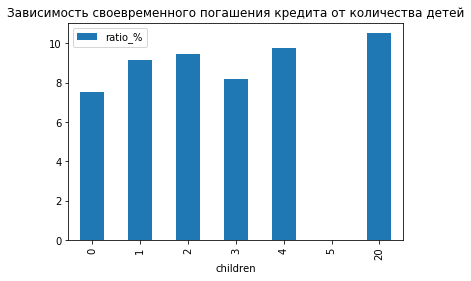

In [34]:
import matplotlib.pyplot as plt
df_pivot_child.plot.bar(y = 'ratio_%')
plt.title('Зависимость своевременного погашения кредита от количества детей')
plt.show()

### Вывод

В итоге мы видим, что риск выдачи кредита для банка в целом увеличивается при увеличении количества детей у кредитополучателя, однако прямой зависимости не наблюдается, к тому же ввиду существенно отличающихся показателей выборки по рассматриваемым группам, например в группе людей, имеющих 5 детей, всего 9 человек, точность выводов при сравнении полученной статистики по разным категориям оставляет желать лучшего.

- Есть ли зависимость между семейным положением и возвратом кредита в срок?

В ходе работы над ответом на поставленный вопрос ниже провдем идентичные действия, проведенные в ходе работы над ответом на предыдущий вопрос, меняя лишь названия столбца, по которому производится анализ зависимости наличия задолженностипо кредиту.

In [35]:
df_family_status_statistic = df.pivot_table(index=['family_status'], values = 'debt', aggfunc= {'count','mean'})
df_family_status_statistic

,count,mean
family_status,,
Не женат / не замужем,2810.0,0.097509
в разводе,1195.0,0.071130
вдовец / вдова,959.0,0.065693
гражданский брак,4151.0,0.093471
женат / замужем,12339.0,0.075452


In [36]:
df_pivot_f = df.pivot_table(index=['family_status'], columns='debt_info', values = 'debt', aggfunc= 'count')
df_pivot_f



debt_info,debt,no_debt
family_status,,
Не женат / не замужем,274,2536
в разводе,85,1110
вдовец / вдова,63,896
гражданский брак,388,3763
женат / замужем,931,11408


In [37]:
df_pivot_f['sum_clients'] = (df_pivot_f['debt'] + df_pivot_f['no_debt'])
df_pivot_f['ratio_%'] = (df_pivot_f['debt'] / df_pivot_f['sum_clients'])*100
df_pivot_f

debt_info,debt,no_debt,sum_clients,ratio_%
family_status,,,,
Не женат / не замужем,274,2536,2810,9.750890
в разводе,85,1110,1195,7.112971
вдовец / вдова,63,896,959,6.569343
гражданский брак,388,3763,4151,9.347145
женат / замужем,931,11408,12339,7.545182


### Вывод

В итоге мы видим, что наиболее рискованными для банка является выдача кредита людям, которые не находятся и никогда не находились в браке. Менее рискованно выдавать кредит людям, которые либо находятся в браке, либо когда-либо в нем находились. Такая статистика возможно связана с психологическими характеристиками людей из указанных категорий, а возможно требуется проведение более глубокого анализа с применением в ходе его других переменных, характеризующих рассматриваемую группу людей.

- Есть ли зависимость между уровнем дохода и возвратом кредита в срок?

В ходе работы над ответом на поставленный вопрос ниже провдем идентичные действия, проведенные в ходе работы над ответом на предыдущий вопрос, меняя лишь названия столбца, по которому производится анализ зависимости наличия задолженностипо кредиту.

In [38]:
df_income_statistic = df.pivot_table(index=['total_income_group'], values = 'debt', aggfunc= {'count','mean'})
df_income_statistic

,count,mean
total_income_group,,
низкий доход,7152.0,0.081236
средний доход,7285.0,0.086754
высокий доход,7017.0,0.075246


In [39]:
df_pivot_income = df.pivot_table(index=['total_income_group'], columns='debt_info', values = 'debt', aggfunc= 'count')
df_pivot_income

debt_info,debt,no_debt
total_income_group,,
низкий доход,581,6571
средний доход,632,6653
высокий доход,528,6489


In [40]:
df_pivot_income['sum_clients'] = (df_pivot_income['debt'] + df_pivot_income['no_debt'])
df_pivot_income['ratio_%'] = (df_pivot_income['debt'] / df_pivot_income['sum_clients'])*100
df_pivot_income

debt_info,debt,no_debt,sum_clients,ratio_%
total_income_group,,,,
низкий доход,581,6571,7152,8.123602
средний доход,632,6653,7285,8.675360
высокий доход,528,6489,7017,7.524583


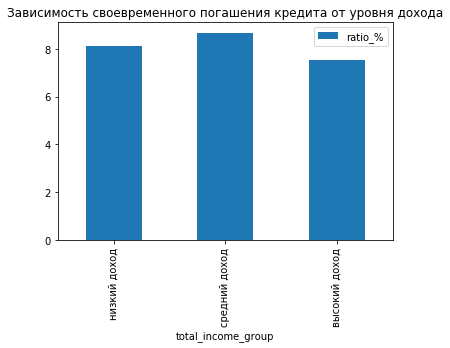

In [41]:
import matplotlib.pyplot as plt
df_pivot_income.plot.bar(y = 'ratio_%')
plt.title('Зависимость своевременного погашения кредита от уровня дохода')
plt.show()

### Вывод

В итоге мы видим, что наиболее рискованными для банка является выдача кредита клиентам со средним доходом. Менее рискованно выдавать кредит клиентам с низким доходом, а наименьший риск для банка связан с выдачей кредитных ресурсов клиентам с высоким доходом. Если в случае с клиентами, имеющими высокий доход, логика в полученном результате прослеживается, то для людей с низким и средним доходом необходимо проведение более глубокого исследования, в том числе необходимо использовать информацию о суммах кредитных средств, которые выдают людям с разными уровнями доходов, а возможно логика кроется в области психологических характеристик людей с тем или иным уровнем дохода. Кроме того, для получения более точных выводов, возможно необходимо разделение уровня доходов более, чем на 3 категории, а при градации диапазонов сумм для каждой категории возможно необходимо применять не статистику банка, а статистику доходов по определенному населенному пункту, жители которого чаще всего получают кредит в данном банке, в случае наличия доступа к такой информации, например средняя заработная плата по региону. Кроме того, как и в вышеуказанном случае, возможно необходимо включение других переменных в ходе анализа.

- Как разные цели кредита влияют на его возврат в срок?

В ходе работы над ответом на поставленный вопрос ниже провдем идентичные действия, проведенные в ходе работы над ответом на предыдущий вопрос, меняя лишь названия столбца, по которому производится анализ зависимости наличия задолженностипо кредиту.

In [42]:
df_purpose_statistic = df.pivot_table(index=['purpose_type'], values = 'debt', aggfunc= {'count','mean'})
df_purpose_statistic

,count,mean
purpose_type,,
автомобиль,972.0,0.092593
недвижимость,3883.0,0.075457
образование,2699.0,0.087440
свадьба,791.0,0.080910


In [43]:
df_pivot_purpose = df.pivot_table(index=['purpose_type'], columns='debt_info', values = 'debt', aggfunc= 'count')
df_pivot_purpose 

debt_info,debt,no_debt
purpose_type,,
автомобиль,90,882
недвижимость,293,3590
образование,236,2463
свадьба,64,727


In [44]:
df_pivot_purpose['sum_clients'] = (df_pivot_purpose['debt'] + df_pivot_purpose['no_debt'])
df_pivot_purpose['ratio_%'] = (df_pivot_purpose['debt'] / df_pivot_purpose['sum_clients'])*100
df_pivot_purpose

debt_info,debt,no_debt,sum_clients,ratio_%
purpose_type,,,,
автомобиль,90,882,972,9.259259
недвижимость,293,3590,3883,7.545712
образование,236,2463,2699,8.743979
свадьба,64,727,791,8.091024


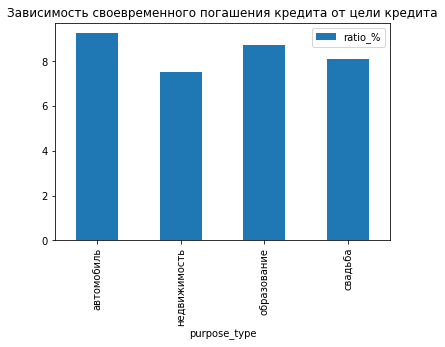

In [45]:
import matplotlib.pyplot as plt
df_pivot_purpose.plot.bar(y = 'ratio_%')
plt.title('Зависимость своевременного погашения кредита от цели кредита')
plt.show()

### Вывод

В итоге мы видим, что наиболее рискованными для банка является выдача кредита на осуществление операций с автомобилем и расходов, свяазанных с получением образования. Менее рискованно выдавать кредит на проведение свадебных мероприятий, а наименьший риск для банка связан с выдачей кредитных ресурсов на осуществление операций с недвижимостью. Вместе с тем, выборка по таким категориям, как автомобиль и свадьба, существенно отличается от выборки по таким категориям, как недвижимость и образование, поэтому для более точного ответа на поставленный вопрос и установления возможных причин такой статистики требуется проведение более глубокого анализа, в том числе путем применения и других переменных.

### Шаг 4. Общий вывод

    По результатам проведенного исследования можно отметить нижеследующие моменты.
    В начале исследования, применив методы isnull() и sum() мы обнаружили  наличие пропусков в 2174 строках рассматриваемой таблицы по столбцам days_employed и total_income, причина появления которых может быть различной, например техническая ошибка специалиста банка при сборе информации о клиенте либо нежелание клиента предоставлять информацию о своем трудовом стаже и суммарном доходе.
    Мы обнаружили наличие пропусков в обоих указанных столбцах по одной отдельно взятой строке, то есть неполнота вышеназванных данных отображается по одному конкретному клиенту, что косвенно может подтверждать вышеуказанное предположение о возможном наличии ошибки со стороны специалиста банка либо нежелании данного конкретного клиента предоставлять указанную информацию.
    Так как мы наблюдаем пропущенные значения в столбцах, содержащих информацию о сумме рабочих дней и сумме общего дохода, в связи с этим необходимо заменить пропущенные значения в данных столбцах на значение медианы по каждому из указанных столбцов с учетом информации о типе занятости, отображенной в столбце  income_type. Выбрано именно значение медианы по столбцу, так как преимущество медианы заключается в устойчивости к выбросам, то есть аномально большим или малым значениям. Вместе с тем, в столбце 'days_employed' мы обнаружитли наличие отрицательных значений, в связи с этим для корректного определения медианы по данному столбцу, используя метод abs(), осуществили перевод отрицательных чисел в положительные. Также провели аналогичные вычисления для столбцов 'children', 'total_income', 'dob_years', наличие отрицательных значений в которых также могло некорректно отразиться на результатах проверки рабочих гипотез в ходе анализа рассматриваемой таблицы, то есть определили наличие в укаказанных столбцах отрицательных знаений и в случае их наличия осуществили их перевод в положительные числа путем использования функции abs(), после чего проверим результат действия функции.
    Для замены пропущенных значений использовали функцию result_to_median, которая принимает в виде аргументов список значений по столбцу income_type и по столбцу столбца, в котором происходит замена NaN. Функция перебирает значения в столбце income_type, а также в интересующих столбцах, требующих замены NaN, и при соблюдении  логического условия NaN в выбранном столбце  заменяются на медиану значений этого столбца в разрезе типов занятости. В результате работы функция возвращает таблицу df. В результате обработки пропусков мы получили таблицу с отсутствующими пропущенными значениями, которые заменены на значения медиан по каждому из указанных столбцов в разрезе каждого уникального типа занятости.
    Далее возникла необходимость в установлении наличие дубликатов в таблице df. Однако, прежде, чем начать поиск и удаление дубликатов,все символы строк столбца 'education' методом str.lower() приведны к нижнему регистру, чтобы учесть такие дубликаты при их поиске.
    В дальнейшем получили суммарное количество дубликатов в таблице df методом duplicated() в сочетании с методом sum(), а именно 71 дубликат, удалили все дубликаты из таблицы df методом drop_duplicates(), исользуем метод reset_index для сохранения порядка индексов. Чтобы убедиться в отсутствии дубликатов в ключевых столбцах, а именно  применили к данным столбцам метод value_counts().
    Путем отработки дубликатов вышеуказанными методами мы убедились в их отсутствии, появление которых может быть связано с разными причинами, например с технической ошибкой специалиста, ответственного за ввод указанной информации в базу данных клиентов. Вместе с тем, информация о цели получения кредита, отображенная в столбце 'purpose', явлется довольно разрозненной, при этом некоторые цели кредита, написанные в виде различных словосочетаний, имеют идентичную или схожую смысловую нагрузку, в связи с чем, чтобы с данной информацией было проще работать и иметь большую величину выборки по конкретной категории для получения более точного результата анализа, возникла необходимость в лемматизации слов, расположенных в строках данного столбца.
    Перед началом лемматизации мы получили список уникальных значений по столбцу 'purpose', чтобы увидеть список всех уникальных слов и словосочетаний, представленных как цели получения кредита.
    Далее, провели процесс лемматизации слов, отображенных в столбце 'purpose', используя библиотеку pymystem3 и создадав функцию purpose_type, вызов которой путем перебора значений в столбце 'purpose' с заданными условиями позволил выделить из указанного набора данных 4 категории, определенные самостоятельно,с учетом полученных уникальных значений. Данные категории содержат более краткую и в то же время достаточную информацию о цели получения кредита для ее использования при проверке гипотез. Для работы с непредсказуемм поведением данных в ходе вызова данной функции использовали конструкию try_except, в частности исходный код поместим в блок try, а при возникновении ошибки в этом блоке в ходе выполнения кода, воспроизведется код из блока except. Вызвав функцию purpose_type, применили ее к столбцу 'purpose',создав в таблице df новый столбец 'purpose_type',который будет содержать 4 категории, полученные в результате лемматизации слов столбца 'purpose' и отражающие цель получения кредита.
    Далее провели категоризацию данных, содержащуюся в столбце 'total_income', а именно сведения о суммарном доходе кредитополучателя, с целью создания категорий, отражающих уровень дохода клиента, исходя из общей суммы его дохода, для последующего использования данных категорий при проверке гипотез.
    Для выделения 3 уровней дохода получили разрез данных столбца total_income' на 3 группы, применив к данному столбцу метод qcut, а полученным группам числовых диапазонов присвоили соответствующие названия групп по уровню дохода.
    В результате категоризации данных в столбце 'total_income' таблицы df мы получили набор катеогрий, указывающий на уровень дохода клиента в зависимости от числового значения его суммарного дохода. Данная информация помещена в отдельный столбец 'total_income_group', сведения из которого использовались при проверке гипотез.
    В процессе проверки рабочих гипотез мы получили нижеследующие результаты.
    Так, риск выдачи кредита для банка в целом увеличивается при увеличении количества детей у кредитополучателя, однако прямой зависимости не наблюдается, к тому же ввиду существенно отличающихся показателей выборки по рассматриваемым группам, например в группе людей, имеющих 5 детей, всего 9 человек, точность выводов при сравнении полученной статистики по разным категориям оставляет желать лучшего.
    Также мы установили, что наиболее рискованными для банка является выдача кредита людям, которые не находятся или никогда не находились в браке. Менее рискованно выдавать кредит людям, которые либо находятся в браке, либо когда-либо в нем находились. Такая статистика возможно связана с психологическими характеристиками людей из указанных категорий, а возможно требуется проведение более глубокого анализа с применением в ходе его других переменных, характеризующих рассматриваемую группу людей.
    В процессе установления зависимости между уровнем дохода и своевременным возвратом кредита мы установили, что наиболее рискованными для банка является выдача кредита клиентам со средним доходом. Менее рискованно выдавать кредит клиентам с низким доходом, а наименьший риск для банка связан с выдачей кредитных ресурсов клиентам с высоким доходом. Если в случае с клиентами, имеющими высокий доход, логика в полученном результате прослеживается, то для людей с низким и средним доходом необходимо проведение более глубокого исследования, в том числе необходимо использовать информацию о суммах кредитных средств, которые выдают людям с разными уровнями доходов, а возможно логика кроется в области психологических характеристик людей с тем или иным уровнем дохода. Кроме того, для получения более точных выводов, возможно необходимо разделение уровня доходов более, чем на 3 категории, а при градации диапазонов сумм для каждой категории возможно необходимо применять не статистику банка, а статистику доходов по определенному населенному пункту, жители которого чаще всего получают кредит в данном банке, в случае наличия доступа к такой информации, например средняя заработная плата по региону. Кроме того, как и в вышеуказанном случае, возможно необходимо включение других переменных в ходе анализа.
    В части наличия зависимости своевременного погашения кредитного долга от цели получения кредита мы установили, что наиболее рискованными для банка является выдача кредита на осуществление операций с автомобилем и расходов, свяазанных с получением образования. Менее рискованно выдавать кредит на проведение свадебных мероприятий, а наименьший риск для банка связан с выдачей кредитных ресурсов на осуществление операций с недвижимостью. Вместе с тем, выборка по таким категориям, как автомобиль и свадьба, существенно отличается от выборки по таким категориям, как недвижимость и образование, поэтому для более точного ответа на поставленный вопрос и установления возможных причин такой статистики требуется проведение более глубокого анализа, в том числе путем применения и других переменных.
    В процессе получения ответов на поставленные в ходе исследования вопросы использовался метод pivot_table, а для более наглядного представления результатов, в частности в виде графика, использовался метод plot.bar().
    В результате проведенного исследования мы установили, что наименьший риск для банка представляют клиенты, которые состоят в браке либо ранее в нем состояли,имеющие высокий либо низкий доход, имеющие, как правило, не более 1 ребенка, и цель получения кредита у которых связана с недвижимостью, в остальных рассмотренных случаях риск выдачи кредита в целом будет увеличиваться. Вместе с тем, как мы уже отметили выше, для более точного ответа необходимо получение дополнительной информации по клиентам, а также выявление вышеуказанных зависимостей не по 2 переменным, а применяя в ходе анализа несколько переменных, создавая, соответственно, новые группы по различным признакам, то есть необходимо проведение комплексного анализа.
    В целом для банковского учреждения можно дать нижеследующие рекомендации:
    1. Тщательнло подходить к полноте отбора всей необходимой информации о кредитополучателе, а также не допускать технических ошибок при вводе данной информации в базу данных.
    2. В имеющуюся базу данных необходимо внести сведения о сумме выданного кредита, сроке его погашения и процентной ставке по кредиту, так как указанные сведения также могут более полно отразить причины несвоевременного погашения кредитного долга.
    3. Также, для ранжирования клиентов по уровню дохода возможно необходимо применение сведений о средней заработной плате по региону, жители которого являются потенциальными получателями кредита, а также использовать иные источники, указывающие на платежеспособность жителей данного региона.
    4. Для групп людей, выдача кредитов которым для банка наиболее рискована, возможно следует продумать предупреждающие меры, направленные на недопущение длительного наличия просроченной задолженности в случае ее возникновения, например залог либо поручительство.
    5. При разработке либо корректировке стратегического и оперативеного планов банка в части экономической безопасности следует учесть вышеуказанные выводы.